# This notebook show the preparation of the data for the machine learning prediction 

The objective here is to obtain a data representing the full grand Prix week end, for every drivers.
Now we have those informations in the data depending on the session name. 
In  our case we need to have them in the same row.

### Import the data and the tools

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv(r'..\Data\allData.csv')

## Checking the data

In [3]:
data.shape

(6625, 25)

In [4]:
data.columns

Index(['number', 'position', 'Q1', 'Q2', 'Q3', 'positionText', 'points',
       'grid', 'laps', 'status', 'year', 'gpName', 'gpNumber', 'sessionName',
       'driverId', 'code', 'DriverNationality', 'constructorId',
       'constructorNationality', 'fastestLapNumber', 'fastestLapRank',
       'fastestLapAvgSpeed', 'fastestLapTime', 'totalTime', 'TimeInterval'],
      dtype='object')

In [5]:
data.describe()

,number,position,points,grid,laps,year,gpNumber,fastestLapNumber,fastestLapRank,fastestLapAvgSpeed,totalTime
count,6625.000000,6605.000000,1599.000000,1599.000000,1599.000000,6625.000000,6625.000000,4915.000000,4915.000000,1526.000000,7.840000e+02
mean,28.059925,10.479485,5.065979,10.151345,54.482802,2019.506113,10.544906,23.241506,10.382299,210.311455,5.668426e+06
std,25.708990,5.756997,7.217079,5.819209,17.902728,1.147093,5.960681,18.519107,5.711499,19.500750,1.275282e+06
min,2.000000,1.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,2.000000,1.000000,140.802000,2.070710e+05
25%,8.000000,5.000000,0.000000,5.000000,52.000000,2018.000000,5.000000,10.000000,5.000000,200.244500,5.280748e+06
50%,18.000000,10.000000,1.000000,10.000000,56.000000,2019.000000,10.000000,14.000000,10.000000,209.825500,5.591682e+06
75%,44.000000,15.000000,8.000000,15.000000,67.000000,2021.000000,16.000000,36.000000,15.000000,224.209000,5.884478e+06
max,99.000000,20.000000,27.000000,20.000000,87.000000,2021.000000,22.000000,85.000000,20.000000,255.014000,1.081032e+07


## Spliting the data into the practice, the race and qualifying 

 The goal of this step is to be able to merge the data to obtain a good data structure for processing

In [6]:
df_race = data[data['sessionName'] == 'Race']

In [7]:
df_practice1 = data[data['sessionName'] == 'Practice 1'][['fastestLapRank','fastestLapTime','year','gpName','driverId']]

In [8]:
df_practice2 = data[data['sessionName'] == 'Practice 2'][['fastestLapRank','fastestLapTime','year','gpName','driverId']]

In [9]:
df_practice3 = data[data['sessionName'] == 'Practice 3'][['fastestLapRank','fastestLapTime','year','gpName','driverId']]

In [10]:
df_practice1 = df_practice1.rename(columns={"fastestLapRank": "fastestLapRankP1","fastestLapTime": "fastestLapTimeP1"})
df_practice2 = df_practice2.rename(columns={"fastestLapRank": "fastestLapRankP2","fastestLapTime": "fastestLapTimeP2"})
df_practice3 = df_practice3.rename(columns={"fastestLapRank": "fastestLapRankP3","fastestLapTime": "fastestLapTimeP3"})

In [11]:
df_quali = data[data['sessionName'] == 'Qualifying'][['Q1','Q2','Q3','year','gpName','driverId']]

#### Data manipulation on race and qualifying to merge them 

In [12]:
df_race.isna().sum()

number                       0
position                    20
Q1                        1619
Q2                        1619
Q3                        1619
positionText                20
points                      20
grid                        20
laps                        20
status                      20
year                         0
gpName                       0
gpNumber                     0
sessionName                  0
driverId                    20
code                         0
DriverNationality           20
constructorId               20
constructorNationality      20
fastestLapNumber            93
fastestLapRank              93
fastestLapAvgSpeed          93
fastestLapTime              93
totalTime                  835
TimeInterval               835
dtype: int64

In [13]:
df_race = df_race.drop(['Q1','Q2','Q3'], axis=1)

In [14]:
df_race['totalTime'].describe()

count    7.840000e+02
mean     5.668426e+06
std      1.275282e+06
min      2.070710e+05
25%      5.280748e+06
50%      5.591682e+06
75%      5.884478e+06
max      1.081032e+07
Name: totalTime, dtype: float64

In [15]:
df_race['totalTime'] = df_race['totalTime'].fillna(df_race['totalTime'].max())

In [16]:
df_race.isna().sum()

number                      0
position                   20
positionText               20
points                     20
grid                       20
laps                       20
status                     20
year                        0
gpName                      0
gpNumber                    0
sessionName                 0
driverId                   20
code                        0
DriverNationality          20
constructorId              20
constructorNationality     20
fastestLapNumber           93
fastestLapRank             93
fastestLapAvgSpeed         93
fastestLapTime             93
totalTime                   0
TimeInterval              835
dtype: int64

first step of our data creation, the race is combined to the qualifying for each drivers 

In [17]:
race_quali = pd.merge(df_race, df_quali, how="left", on=['year','gpName','driverId'])

In [18]:
race_quali.shape 

(1619, 25)

In [19]:
race_quali.columns

Index(['number', 'position', 'positionText', 'points', 'grid', 'laps',
       'status', 'year', 'gpName', 'gpNumber', 'sessionName', 'driverId',
       'code', 'DriverNationality', 'constructorId', 'constructorNationality',
       'fastestLapNumber', 'fastestLapRank', 'fastestLapAvgSpeed',
       'fastestLapTime', 'totalTime', 'TimeInterval', 'Q1', 'Q2', 'Q3'],
      dtype='object')

Second step is to combined the practices data with 

In [20]:
race_quali_1 = pd.merge(race_quali, df_practice1, how="left", on=['year','gpName','driverId'])

In [21]:
race_quali_12 = pd.merge(race_quali_1, df_practice2, how="left", on=['year','gpName','driverId'])

In [22]:
data_complete = pd.merge(race_quali_12, df_practice3, how="left", on=['year','gpName','driverId'])

In [23]:
data_complete.columns

Index(['number', 'position', 'positionText', 'points', 'grid', 'laps',
       'status', 'year', 'gpName', 'gpNumber', 'sessionName', 'driverId',
       'code', 'DriverNationality', 'constructorId', 'constructorNationality',
       'fastestLapNumber', 'fastestLapRank', 'fastestLapAvgSpeed',
       'fastestLapTime', 'totalTime', 'TimeInterval', 'Q1', 'Q2', 'Q3',
       'fastestLapRankP1', 'fastestLapTimeP1', 'fastestLapRankP2',
       'fastestLapTimeP2', 'fastestLapRankP3', 'fastestLapTimeP3'],
      dtype='object')

In [24]:
data_complete.shape

(1619, 31)

We have now finaly a data that represent the entire week end (Grand prix) for a driver 

# Now we have to make the data suitable for the predictions  

We want to predict the position of a driver before the race but after the practices sessions and the qualifying. 
To do so we have to predict the variable " Position ". 
To avoid biased predictions, we have to drop the variables that are calculated after the race.
We will also drop the variables that are representing the same information ( number, code, driverID represente the same information).

In [25]:
df_pred_postion = data_complete.drop(['positionText','points','laps','status','fastestLapNumber', 'fastestLapRank', 'fastestLapAvgSpeed',
       'fastestLapTime', 'totalTime', 'TimeInterval','code','driverId','sessionName'], axis=1)

In [26]:
df_pred_postion.shape

(1619, 18)

In [27]:
df_pred_postion.isna().sum()

number                      0
position                   20
grid                       20
year                        0
gpName                      0
gpNumber                    0
DriverNationality          20
constructorId              20
constructorNationality     20
Q1                         46
Q2                        449
Q3                        838
fastestLapRankP1          900
fastestLapTimeP1          900
fastestLapRankP2          227
fastestLapTimeP2          227
fastestLapRankP3          401
fastestLapTimeP3          401
dtype: int64

## Dealing with NaN values and conversion

In [28]:
df_pred_postion['fastestLapTimeP3'].describe()

count                       1218
unique                      1202
top       0 days 00:01:43.294000
freq                           2
Name: fastestLapTimeP3, dtype: object

In [29]:
def timeStrToInt(df,columnName):
    l = []
    is_na = df[columnName].isna()
    for i in range(len(df[columnName])):
        is_nai = is_na[i]
        if  is_nai == False :
            value = df[columnName][i]
            if type(value) == np.int64:
                l.append(value)
            else:
                a = value.split(':')
                b = list(map(float,a[1:]))
                l.append(int((b[0]*60*1000 + b[1])*1000))
        else:
            l.append(58276750)
    df[columnName] = l

In [30]:
timeStrToInt(df_pred_postion,'fastestLapTimeP1')
timeStrToInt(df_pred_postion,'fastestLapTimeP2')
timeStrToInt(df_pred_postion,'fastestLapTimeP3')

In [31]:
df_pred_postion['fastestLapTimeP1'].describe()

count    1.619000e+03
mean     5.827675e+07
std      6.732202e+06
min      1.794000e+03
25%      5.827675e+07
50%      5.827675e+07
75%      6.002588e+07
max      6.004926e+07
Name: fastestLapTimeP1, dtype: float64

In [32]:
df_pred_postion.isna().sum()

number                      0
position                   20
grid                       20
year                        0
gpName                      0
gpNumber                    0
DriverNationality          20
constructorId              20
constructorNationality     20
Q1                         46
Q2                        449
Q3                        838
fastestLapRankP1          900
fastestLapTimeP1            0
fastestLapRankP2          227
fastestLapTimeP2            0
fastestLapRankP3          401
fastestLapTimeP3            0
dtype: int64

Q1 Q2 and Q3 must have normaly NaN values, because the drivers are qualified or not to the next Q.
In order to deal with that, we'll put the time of the precedent Q in the one missing.

In [33]:
df_pred_postion[df_pred_postion['Q1'].isna()]

,number,position,grid,year,gpName,gpNumber,DriverNationality,constructorId,constructorNationality,Q1,Q2,Q3,fastestLapRankP1,fastestLapTimeP1,fastestLapRankP2,fastestLapTimeP2,fastestLapRankP3,fastestLapTimeP3
74,8,15.0,20.0,2018,Azerbaijan Grand Prix,4,French,haas,American,NaN,NaN,NaN,14.0,60046856,13.0,60044425,15.0,60045261
91,28,12.0,20.0,2018,Spanish Grand Prix,5,New Zealander,toro_rosso,Italian,NaN,NaN,NaN,NaN,58276750,18.0,60021265,17.0,60019428
108,33,9.0,20.0,2018,Monaco Grand Prix,6,Dutch,red_bull,Austrian,NaN,NaN,NaN,3.0,60012280,2.0,60012035,2.0,60011787
131,8,12.0,20.0,2018,Canadian Grand Prix,7,French,haas,American,NaN,NaN,NaN,NaN,58276750,7.0,60013620,9.0,60013014
191,18,12.0,19.0,2018,British Grand Prix,10,Canadian,williams,British,NaN,NaN,NaN,10.0,60029878,NaN,58276750,NaN,58276750
199,28,20.0,0.0,2018,British Grand Prix,10,New Zealander,toro_rosso,Italian,NaN,NaN,NaN,19.0,60030749,NaN,58276750,NaN,58276750
469,23,10.0,0.0,2019,Chinese Grand Prix,3,Thai,toro_rosso,Italian,NaN,NaN,NaN,NaN,58276750,12.0,60034634,9.0,60034600
474,99,15.0,19.0,2019,Chinese Grand Prix,3,Italian,alfa,Swiss,NaN,NaN,NaN,NaN,58276750,18.0,60035914,16.0,60035726
489,7,10.0,0.0,2019,Azerbaijan Grand Prix,4,Finnish,alfa,Swiss,NaN,NaN,NaN,NaN,58276750,14.0,60045482,10.0,60043537
496,10,17.0,0.0,2019,Azerbaijan Grand Prix,4,French,red_bull,Austrian,NaN,NaN,NaN,NaN,58276750,9.0,60044240,20.0,60047836


In [34]:
def timeStrToIntQ1(df):
    l = []
    is_na = df['Q1'].isna()
    for i in range(len(df['Q1'])):
        is_nai = is_na[i]
        if  is_nai == False :
            value = df['Q1'][i]
            if type(value) == np.int64:
                l.append(value)
            else:
                a = value.split(':')
                b = list(map(float,a))
                l.append(int((b[0]*60*1000 + b[1])*1000))
        else:
            l.append(120004382)
    df['Q1'] = l

def timeStrToIntQ2_3(df, Q_number):
    l = []
    Q = 'Q'+str(Q_number)
    is_na = df[Q].isna()
    for i in range(len(df[Q])):
        is_nai = is_na[i]
        if  is_nai == False :
            value = df[Q][i]
            if type(value) == np.int64:
                l.append(value)
            else:
                a = value.split(':')
                b = list(map(float,a))
                l.append(int((b[0]*60*1000 + b[1])*1000))
        else:
            c_name = 'Q'+ str((Q_number-1))
            l.append(df[c_name].iloc[i])
    df[Q] = l


In [35]:
timeStrToIntQ1(df_pred_postion)
timeStrToIntQ2_3(df_pred_postion,2)
timeStrToIntQ2_3(df_pred_postion,3)

In [36]:
df_pred_postion = df_pred_postion.dropna(subset=['position'])

Now we have to take care of the laps rank, because we don't have the data,
we presume it is because the drivers did not compete 
on those practices sessions. So their ranks are after the last one possible : 21 

In [37]:
df_pred_postion.loc[df_pred_postion.fastestLapRankP1.isna(), 'fastestLapRankP1'] = 21
df_pred_postion.loc[df_pred_postion.fastestLapRankP2.isna(), 'fastestLapRankP2'] = 21
df_pred_postion.loc[df_pred_postion.fastestLapRankP3.isna(), 'fastestLapRankP3'] = 21

In [38]:
df_pred_postion.isna().sum()

number                    0
position                  0
grid                      0
year                      0
gpName                    0
gpNumber                  0
DriverNationality         0
constructorId             0
constructorNationality    0
Q1                        0
Q2                        0
Q3                        0
fastestLapRankP1          0
fastestLapTimeP1          0
fastestLapRankP2          0
fastestLapTimeP2          0
fastestLapRankP3          0
fastestLapTimeP3          0
dtype: int64

we have noticed that when the driver can't do the Qualifying, it can happen that the driver will have a grid of 0
In real life, they start the grand prix from the pit line, we'll assume that the pit line is the position 21 on the grid.
To have logique grid data we need to have that : 

In [39]:
df_pred_postion.loc[df_pred_postion.grid == 0.0, 'grid'] = 21.0

## data homogenization

Now we have to change the format of some variables to make sure that the classifiers support the data 

In [40]:
df_pred_postion.columns

Index(['number', 'position', 'grid', 'year', 'gpName', 'gpNumber',
       'DriverNationality', 'constructorId', 'constructorNationality', 'Q1',
       'Q2', 'Q3', 'fastestLapRankP1', 'fastestLapTimeP1', 'fastestLapRankP2',
       'fastestLapTimeP2', 'fastestLapRankP3', 'fastestLapTimeP3'],
      dtype='object')

In [41]:
df_features = pd.get_dummies(df_pred_postion, columns = [ 'gpName',
       'DriverNationality', 'constructorId', 'constructorNationality'])

## Scale data 

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
to_scale = ['Q1','Q2', 'Q3','fastestLapTimeP1',
       'fastestLapTimeP2', 'fastestLapTimeP3']
df_scaled = df_features.copy()
df_scaled[to_scale] = scaler.fit_transform(df_scaled[to_scale].to_numpy())
df_scaled.head()

,number,position,grid,year,gpNumber,Q1,Q2,Q3,fastestLapRankP1,fastestLapTimeP1,...,constructorId_toro_rosso,constructorId_williams,constructorNationality_American,constructorNationality_Austrian,constructorNationality_British,constructorNationality_French,constructorNationality_German,constructorNationality_Indian,constructorNationality_Italian,constructorNationality_Swiss
0,5,1.0,3.0,2018,1,0.499880,0.499869,0.499869,5.0,0.999596,...,0,0,0,0,0,0,0,0,1,0
1,44,2.0,1.0,2018,1,0.499876,0.499870,0.499864,1.0,0.999580,...,0,0,0,0,0,0,1,0,0,0
2,7,3.0,2.0,2018,1,0.499878,0.499874,0.499869,4.0,0.999594,...,0,0,0,0,0,0,0,0,1,0
3,3,4.0,8.0,2018,1,0.499881,0.499877,0.499872,6.0,0.999597,...,0,0,0,1,0,0,0,0,0,0
4,14,5.0,10.0,2018,1,0.499882,0.499884,0.499885,8.0,0.999611,...,0,0,0,0,1,0,0,0,0,0


In [44]:
df_scaled = pd.DataFrame(df_scaled, columns= df_features.columns)

## Prediction models with scaled Data 

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [462]:
def error_calculation(error):
    round_error = round(error)
    mape = 100 * (error / y_test)
    count = 0
    for elmt in round_error:
        if elmt==0:
            count+=1
    print('Mean Absolute Error:', round(np.mean(error), 2))
    print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')
    print('Accuracy :',count/len(round_error)*100, '%.')       
   

In [463]:
def error_calculationNoDisplay(error):
    round_error = round(error)
    mape = 100 * (error / y_test)
    count = 0
    for elmt in round_error:
        if elmt==0:
            count+=1
    return [round(np.mean(error), 2),round(np.mean(mape), 2),count/len(round_error)*100]

In [473]:
def evaluate(model, test_features, test_labels,display=True):
    y_pred = model.predict(test_features) 
    error = abs(y_pred - test_labels)
    error_calculation(error)
    return y_pred

In [474]:
def evaluateNoDisplay(model, test_features, test_labels,display=True):
    y_pred = model.predict(test_features) 
    error = abs(y_pred - test_labels)
    return y_pred,error_calculationNoDisplay(error)

In [48]:
def test_train_creation(df):
    train, test = train_test_split(df, test_size=0.2)
    X_train = train.drop(['position'], axis=1)
    y_train = train['position']
    X_test = test.drop(['position'], axis=1)
    y_test = test['position']
    return X_train,y_train,X_test,y_test

### We try a Random forest 

In [419]:
X_train,y_train,X_test,y_test = test_train_creation(df_scaled)

In [420]:
random_forest = RandomForestRegressor() 
model_rd = random_forest.fit(X_train, y_train)
model_rd.score(X_train,y_train)

0.9163820736034693

In [421]:
y_pred = evaluate(random_forest, X_test, y_test)

Mean Absolute Error: 3.51
Mean Absolute Percentage Error : 66.92 %.
Accuracy : 9.6875 %.


Text(0.5, 0, 'Relative Importance')

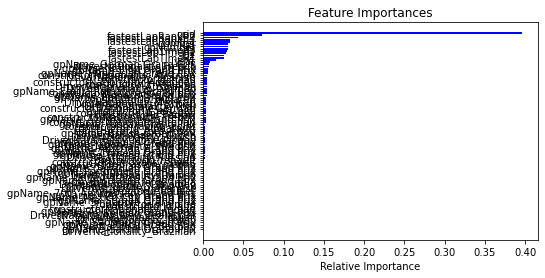

In [422]:
importances = model_rd.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')

We can see from this graph that mst of the features like the nationality ones are note usefull at all.

In [53]:
[X_test.columns[i] for i in indices][-15:]

['gpName_German Grand Prix',
 'DriverNationality_French',
 'year',
 'fastestLapTimeP1',
 'fastestLapRankP1',
 'Q3',
 'Q2',
 'Q1',
 'fastestLapTimeP3',
 'number',
 'fastestLapTimeP2',
 'gpNumber',
 'fastestLapRankP3',
 'fastestLapRankP2',
 'grid']

## Searching a good regression algorithm ,Not scaled data ( to compare )

In [423]:
X_train,y_train,X_test,y_test = test_train_creation(df_features)

In [55]:
model_lm = LinearRegression()
model_lm.fit(X_train, y_train)
print('Score on train data:',model_lm.score(X_train, y_train))
y_pred = evaluate(model_lm, X_test, y_test)

Score on train data: 0.49782671191434436
Mean Absolute Error: 3.65
Mean Absolute Percentage Error : 60.88 %.
Accuracy : 8.125 %.


In [301]:
random_forest = RandomForestRegressor() 
model_rd = random_forest.fit(X_train, y_train)
print('Score on train data:',model_rd.score(X_train, y_train))
y_pred = evaluate(random_forest, X_test, y_test)

Score on train data: 0.9172878517722879
Mean Absolute Error: 3.64
Mean Absolute Percentage Error : 80.94 %.
Accuracy : 5.0 %.


In [58]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_pred = lda.fit(X_train, y_train).predict(X_test)
print('Score on train data:',lda.score(X_train, y_train))
y_pred = evaluate(lda, X_test, y_test)

Score on train data: 0.24628616106333073
Mean Absolute Error: 4.16
Mean Absolute Percentage Error : 49.99 %.
Accuracy : 7.8125 %.


In [59]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X_train, y_train).predict(X_test)
print('Score on train data:',qda.score(X_train, y_train))
y_pred = evaluate(qda, X_test, y_test)

Score on train data: 0.7114933541829555
Mean Absolute Error: 5.95
Mean Absolute Percentage Error : 56.52 %.
Accuracy : 6.25 %.


C:\Users\benja\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [60]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
print('Score on train data:',clf.score(X_train, y_train))
y_pred = evaluate(clf, X_test, y_test)

Score on train data: 0.05394839718530102
Mean Absolute Error: 8.32
Mean Absolute Percentage Error : 73.07 %.
Accuracy : 4.375 %.


The results show that it is ambiguous between scaled or not scaled data we should use. The random forest seems to be the best option.

## Drop useless data

In [61]:
df_features2 =  pd.get_dummies(df_pred_postion, columns = ['constructorId'])


In [62]:
df_features2=df_features2.drop(['DriverNationality','constructorNationality','gpName'], axis=1)

In [63]:
df_features2.shape

(1599, 29)

In [64]:
scaler = MinMaxScaler()
to_scale = ['Q1','Q2', 'Q3','fastestLapTimeP1',
       'fastestLapTimeP2', 'fastestLapTimeP3']
df_scaled2 = df_features2.copy()
df_scaled2[to_scale] = scaler.fit_transform(df_scaled2[to_scale].to_numpy())
df_scaled2 = pd.DataFrame(df_scaled2, columns= df_features2.columns)

## The data is now trained considering the season and not the previous ones ( exeption for the first GP)

In [65]:
def which_gp(gpNumber,year,df):
    if gpNumber != 1:
        idx = df[(df['gpNumber']==gpNumber) & (df['year']==year)].index[0]
        idx_begin = df[df['year']==year].index[0]
        idx_end = idx+20
        train = df.iloc[idx_begin:idx]
        test = df.iloc[idx:idx_end]
    else:
        idx = df[(df['gpNumber']==gpNumber) & (df['year']==year)].index[0]
        idx_begin = df[df['year']==(year-1)].index[0]
        idx_end = idx+20
        train = df.iloc[idx_begin:idx]
        test = df.iloc[idx:idx_end]
    return train,test

#### Test without the new data format

In [66]:
X_train,y_train,X_test,y_test = test_train_creation(df_features2)

In [448]:
clf = RandomForestClassifier()
model_rf = clf.fit(X_train, y_train)
print('Score on train data:',clf.score(X_train, y_train))
y_pred = evaluate(clf, X_test, y_test)

Score on train data: 1.0
Mean Absolute Error: 3.7
Mean Absolute Percentage Error : 37.24 %.
Accuracy : 15.0 %.


#### test with the good data format

In [68]:
def test_train_creation_gp(df,year,gpNumber):
    train, test = which_gp(gpNumber,year,df)
    X_train = train.drop(['position'], axis=1)
    y_train = train['position']
    X_test = test.drop(['position'], axis=1)
    y_test = test['position']
    return X_train,y_train,X_test,y_test

In [69]:
X_train,y_train,X_test,y_test = test_train_creation_gp(df_features2,2019,10)

In [446]:
clf = RandomForestRegressor()
model_rf = clf.fit(X_train, y_train)
print('Score on train data:',clf.score(X_train, y_train))
y_pred_reg,acc = evaluate(clf, X_test, y_test)

Score on train data: 0.925293723783142
Mean Absolute Error: 3.79
Mean Absolute Percentage Error : 62.53 %.
Accuracy : 25.0 %.


In [436]:
clf = RandomForestClassifier()
model_rf = clf.fit(X_train, y_train)
print('Score on train data:',clf.score(X_train, y_train))
y_pred,acc = evaluate(clf, X_test, y_test)

Score on train data: 1.0
Mean Absolute Error: 3.7
Mean Absolute Percentage Error : 36.27 %.
Accuracy : 10.0 %.


#### We must have have,as a result, a ranking of every driver.

In [492]:
def rank(y_pred):
    y_pred_1 =  y_pred.copy()
    y_pred.sort()
    for i in range(len(y_pred_1)):
        for j in range(len(y_pred)):
            if y_pred_1[i] == y_pred[j]:
                y_pred_1[i] = j+1
    return y_pred_1

In [522]:
def evaluaterank(test_labels,y_pred):
    y_pred = rank(y_pred)
    error = abs(y_pred - test_labels)
    error_calculation(error)
    return y_pred

In [521]:
def evaluaterankNoDisplay(test_labels,y_pred):
    y_pred = rank(y_pred)
    error = abs(y_pred - test_labels)
    error_calculationNoDisplay(error)
    return y_pred

In [490]:
y_pred_reg = evaluaterank(y_test,y_pred_reg)

AttributeError: 'tuple' object has no attribute 'copy'

## Finding the best classification algorithm with scaled data

In [209]:
X_train,y_train,X_test,y_test = test_train_creation_gp(df_scaled2,2019,10)

In [300]:
random_forest = RandomForestClassifier() 
model_rd = random_forest.fit(X_train, y_train)
print('Score on train data:',random_forest.score(X_train, y_train))
y_pred = evaluate(random_forest, X_test, y_test)
y_pred

Score on train data: 1.0
Mean Absolute Error: 4.15
Mean Absolute Percentage Error : 71.21 %.
Accuracy : 5.0 %.


array([ 3., 12.,  1.,  4., 12.,  7.,  4., 15.,  5., 12.,  7., 19., 11.,
        9.,  8., 13.,  8., 17., 14., 18.])

Text(0.5, 0, 'Relative Importance')

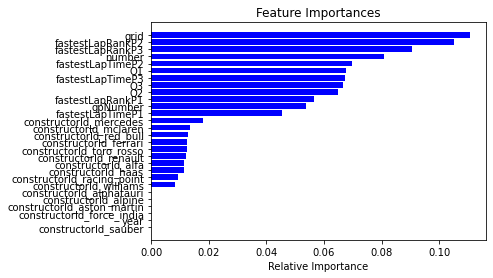

In [232]:
importances = model_rd.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')

In [430]:
model_svm = svm.LinearSVC()
model_svm.fit(X_train, y_train)
print('Score on train data:',random_forest.score(X_train, y_train))
y_pred = evaluate(model_svm, X_test, y_test)


Score on train data: 0.5296238908331339
Mean Absolute Error: 6.53
Mean Absolute Percentage Error : 79.19 %.
Accuracy : 4.0625 %.


C:\Users\benja\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [254]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print('Score on train data:',knn.score(X_train, y_train))
y_pred = evaluate(knn, X_test, y_test)
y_pred

Score on train data: 0.4111111111111111
Mean Absolute Error: 3.2
Mean Absolute Percentage Error : 27.73 %.
Accuracy : 20.0 %.


array([ 1.,  2.,  5.,  4.,  4.,  8.,  6., 11., 13.,  7.,  6.,  7., 13.,
       15., 18.,  4., 10., 16., 12., 14.])

In [256]:
log_Reg = LogisticRegression()
log_Reg.fit(X_train, y_train)
print('Score on train data:',log_Reg.score(X_train, y_train))
y_pred = evaluate(log_Reg, X_test, y_test)
y_pred

Score on train data: 0.2388888888888889
Mean Absolute Error: 2.9
Mean Absolute Percentage Error : 32.01 %.
Accuracy : 10.0 %.


C:\Users\benja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 2.,  2.,  5.,  5.,  4.,  8.,  9.,  9., 17., 10.,  5.,  8., 12.,
       15., 16.,  5., 12., 16., 13., 17.])

In [258]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
print('Score on train data:',clf.score(X_train, y_train))
y_pred = evaluate(clf, X_test, y_test)
y_pred                            

Score on train data: 1.0
Mean Absolute Error: 4.8
Mean Absolute Percentage Error : 45.22 %.
Accuracy : 25.0 %.


array([ 1.,  2.,  3.,  4.,  3., 19.,  6., 15., 19., 19.,  7., 19., 13.,
       18., 16.,  5.,  9., 13., 14., 11.])

We can see that the results are the best for the Random Forest. Now we have to improve this result

In classification or in regression, random forest seems to be the best. We'll try to make the classification and the regressio,n work together  

# Test Random Forest with GridSearch 

### Not Scaled 

In [315]:
X_train,y_train,X_test,y_test = test_train_creation_gp(df_features2,2021,10)

In [316]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## Regression 

In [359]:

n_estimators = [100,200,400,600,800]
max_features = ['auto', 'sqrt']
max_depth = [3,5,10,20,30]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [360]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   29.1s finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 400, 600,
                                                         800]},
                   random_state=42, verbose=2)

In [542]:
best_random = rf_random.best_estimator_
best_random

RandomForestRegressor(max_depth=3, min_samples_leaf=2)

In [541]:
print('Score on train data:',best_random.score(X_train, y_train))
y_pred = evaluate(best_random, X_test, y_test)

Score on train data: 0.4402255483828792
Mean Absolute Error: 3.23
Mean Absolute Percentage Error : 57.19 %.
Accuracy : 20.0 %.


In [363]:
y_pred

array([10.29443171,  9.96642497, 10.38484781,  8.86415291,  8.80945345,
       11.28290235, 10.22178736, 14.50152014, 10.58772325, 15.51304741,
       11.44721701, 13.40096683, 14.68392719, 15.50909194, 12.36353086,
       14.19347836, 16.95769135, 16.97432324,  9.44846637, 10.46229734])

In [364]:
y_pred = evaluaterank(y_test,y_pred)

Mean Absolute Error: 4.1
Mean Absolute Percentage Error : 68.92 %.
Accuracy : 10.0 %.


In [365]:
y_pred

array([ 6.,  4.,  7.,  2.,  1., 10.,  5., 15.,  9., 18., 11., 13., 16.,
       17., 12., 14., 19., 20.,  3.,  8.])

## Classification

In [317]:
param_grid = { 
    'n_estimators': [100,500,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,None],
    'criterion' :['gini', 'entropy']
}

In [322]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
CV_rfc.fit(X_train, y_train)

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 90 is smaller than n_iter=100. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 90 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   46.3s finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 500, 800]},
                   random_state=42, verbose=2)

In [329]:
best_randomCV = CV_rfc.best_estimator_
best_random

RandomForestRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=800)

In [330]:
print('Score on train data:',best_randomCV.score(X_train, y_train))
y_pred = evaluate(best_randomCV, X_test, y_test)

Score on train data: 1.0
Mean Absolute Error: 4.1
Mean Absolute Percentage Error : 67.67 %.
Accuracy : 10.0 %.


In [331]:
y_pred

array([ 7.,  4.,  3.,  4.,  7.,  8.,  9., 19., 19., 16.,  9., 14., 14.,
       18., 19., 15., 19., 19., 13.,  2.])

## Scaled

In [305]:
X_train,y_train,X_test,y_test = test_train_creation_gp(df_scaled2,2021,15)

### Regressor

In [312]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   55.2s finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10, 15, 20, 30,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [313]:
best_random = rf_random.best_estimator_
print(best_random)
print('Score on train data:',best_random.score(X_train, y_train))
y_pred,acc = evaluate(best_random, X_test, y_test)
print(y_pred)
y_pred = evaluaterank(y_test,y_pred)
print(y_pred)

RandomForestRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=800)
Score on train data: 0.5398436938345037
Mean Absolute Error: 3.95
Mean Absolute Percentage Error : 104.72 %.
Accuracy : 5.0 %.
[ 8.73354723 13.74021885  7.59010141  7.21994167 13.06908653  7.7501183
  7.42003164 12.08738211  8.12922859  7.67299801  8.00494688 10.52561592
 11.23461892  8.24503497 12.06420739 13.72942705 12.2659742  15.57481408
 14.43553707 14.66121173]
Mean Absolute Error: 4.0
Mean Absolute Percentage Error : 111.86 %.
Accuracy : 10.0 %.
[ 9. 17.  3.  1. 15.  5.  2. 13.  7.  4.  6. 10. 11.  8. 12. 16. 14. 20.
 18. 19.]


### Classificator 

In [310]:
rfc=RandomForestClassifier(random_state=42)
CV_rfc = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, n_iter = 100, cv = 2, verbose=2, random_state=42, n_jobs = -1)
CV_rfc.fit(X_train, y_train)

C:\Users\benja\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   36.0s finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [500, 800]},
                   random_state=42, verbose=2)

In [311]:
best_randomCV = CV_rfc.best_estimator_
print(best_random)
print('Score on train data:',best_randomCV.score(X_train, y_train))
y_pred = evaluate(best_randomCV, X_test, y_test)
print(y_pred)

RandomForestRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=800)
Score on train data: 0.7928571428571428
Mean Absolute Error: 4.15
Mean Absolute Percentage Error : 83.06 %.
Accuracy : 0.0 %.
[ 3. 18.  6.  5.  3.  7.  4. 15.  5. 12.  7.  5. 12.  9.  8. 13. 12. 17.
 14. 16.]


After the analysis of the results, we can observe that the tunning of parameter is not really the good methode.
We have a dataset that changes everytime, so we are not able to find the best parameters. Especially for the begining of the season

The strategie now is to keep the random forest but to decide between the regressor or the classificator one.

We also have to finally decide between the scaled data and the normal ones. 

To do so we'll compare all the possibilities and the results that are possible in our dataset

#### All the possibilities predicted from non scaled data 

In [546]:
year = [2018,2019,2020,2021]
GpNumber = [i for i in range(1,22)]
reg=[]
clf = []
for y in year:
    for g in GpNumber:
        try:

            X_train,y_train,X_test,y_test = test_train_creation_gp(df_features2,y,g)
            random_forest = RandomForestClassifier() 
            model_rd = random_forest.fit(X_train, y_train)

            y_pred = evaluateNoDisplay(random_forest, X_test, y_test)
            clf.append((y_pred,y,g))

            random_forest = RandomForestRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=10,n_estimators=800)
            model_rd = random_forest.fit(X_train, y_train)
            y_pred,acc = evaluateNoDisplay(random_forest, X_test, y_test)
            l=[]
            l.append((y,g))
            l.append(acc)
            l.append(y_test)
            l.append(y_pred.copy())
            y_pred_2 = evaluaterankNoDisplay(y_test,y_pred)
            l.append(y_pred_2)
            reg.append(l)
        except : 
            print( 'error at:',y,' ',g)
            
            

error at: 2018   1
error at: 2020   18
error at: 2020   19
error at: 2020   20
error at: 2020   21
error at: 2021   21


In [547]:
sum_reg = 0
for i in reg: 
    sum_reg+= i[1][2]
print('Average Accuracy regression without ranking :',sum_reg/len(reg),'%')

Average Accuracy regression without ranking : 9.551282051282051 %


In [551]:
sum_rank = 0
for i in reg:
    t = i[4]
    c = 0
    for pos in range(0,20):
        if (1+pos)==t[pos]:
            c+=1
    sum_rank+=((c/20)*100)
print('Average Accuracy regression with ranking :',sum_rank/len(reg),'%')
        

Average Accuracy regression with ranking : 11.08974358974359 %


In [539]:
clf[:3]

[((array([18., 18., 18., 18., 18., 18., 18., 18., 18., 12., 18., 18., 18.,
          20., 20., 12., 18., 18., 18., 18.]),
   [7.8, 224.33, 5.0]),
  2018,
  2),
 ((array([ 4.,  2., 18.,  2., 12., 12.,  7.,  1., 12., 13., 12., 14.,  8.,
          14., 15., 12., 14., 12., 12., 17.]),
   [3.85, 71.64, 20.0]),
  2018,
  3),
 ((array([ 2.,  3., 12.,  8.,  9., 16.,  7., 14., 16., 18., 16., 18., 19.,
           2., 16.,  5.,  1., 14., 11., 14.]),
   [6.25, 76.03, 5.0]),
  2018,
  4)]

When we look at the result of the Classificator, we can see that it is not a logical result for our problem.
Having a regressor allows us to classifie the position of the driver in a better way because the regressor will not give us two times the same result.

We will focus on the regressor

Now we are also testing on the scaled data.

In [566]:
year = [2018,2019,2020,2021]
GpNumber = [i for i in range(1,22)]
reg_scaled=[]
clf_scaled = []
for y in year:
    for g in GpNumber:
        try:
            X_train,y_train,X_test,y_test = test_train_creation_gp(df_scaled2,y,g)
            random_forest = RandomForestClassifier() 
            model_rd = random_forest.fit(X_train, y_train)

            y_pred = evaluateNoDisplay(random_forest, X_test, y_test)
            clf.append((y_pred,y,g))

            random_forest = RandomForestRegressor() 
            model_rd = random_forest.fit(X_train, y_train)
            y_pred,acc = evaluateNoDisplay(random_forest, X_test, y_test)
            l=[]
            l.append((y,g))
            l.append(acc)
            l.append(y_test)
            l.append(y_pred.copy())
            y_pred_2 = evaluaterankNoDisplay(y_test,y_pred)
            l.append(y_pred_2)
            reg_scaled.append(l)
        except : 
            print( 'error at:',y,' ',g)
            

error at: 2018   1
error at: 2020   18
error at: 2020   19
error at: 2020   20
error at: 2020   21
error at: 2021   21


In [571]:
sum_reg = 0
for i in reg_scaled: 
    sum_reg+= i[1][2]
print('Average Accuracy regression without ranking :',sum_reg/len(reg),'%')

Average Accuracy regression without ranking : 8.012820512820513 %


In [568]:
sum_rank = 0
for i in reg_scaled:
    t = i[4]
    c = 0
    for pos in range(0,20):
        if (1+pos)==t[pos]:
            c+=1
    sum_rank+=((c/20)*100)
print('Average Accuracy regression with ranking :',sum_rank/len(reg),'%')
        

Average Accuracy regression with ranking : 12.115384615384615 %


## After several testing with the supposed best parameters etc, We conclude that the best opportunity to predict the race result is  the Random forest regression with ranking on the scaled data.